In [2]:
import numpy as np
import matplotlib.pyplot as plt

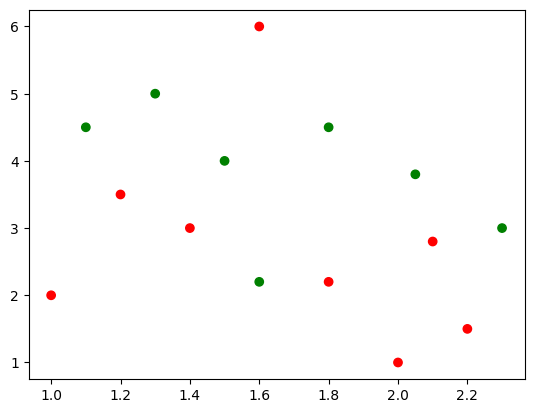

In [126]:
Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])
X = np.array([
    [1, 1.2, 1.4, 1.6,   1.8, 2,  1.1, 1.3, 1.5, 1.6, 1.8, 2.1, 2.2, 2.3, 2.05],
    [2, 3.5,   3,   6,   2.2, 1,  4.5,   5,   4, 2.2, 4.5, 2.8, 1.5,  3, 3.8]
])

plt.scatter(X[0], X[1], c=np.where(Y <= 0.5, 'red', 'green'))
plt.show()

degree = 5
thetas_count = (degree - 1)*len(X) + 1

In [127]:
def sigmoid(theta, x):
    return 1/(1+np.exp(-theta.dot(x.transpose())))

def cost(theta, X, Y):
    return (Y - sigmoid(theta, X))/len(Y)

def logistic_regression(X, Y, l, iterations):
    theta = np.ones(thetas_count)
    
    for k in range(iterations):
        theta = theta + l*cost(theta, X, Y).dot(X)
    return theta


In [149]:
powers = np.arange(1, degree)
X_powers = X[:,:, None]**powers
print(X_powers)
transposed = X_powers.transpose(1,0,2).reshape(X_powers.shape[1], -1, order='F')
print(transposed)
X_final = np.insert(transposed, 0, 1, axis=1)

[[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [1.20000000e+00 1.44000000e+00 1.72800000e+00 2.07360000e+00]
  [1.40000000e+00 1.96000000e+00 2.74400000e+00 3.84160000e+00]
  [1.60000000e+00 2.56000000e+00 4.09600000e+00 6.55360000e+00]
  [1.80000000e+00 3.24000000e+00 5.83200000e+00 1.04976000e+01]
  [2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01]
  [1.10000000e+00 1.21000000e+00 1.33100000e+00 1.46410000e+00]
  [1.30000000e+00 1.69000000e+00 2.19700000e+00 2.85610000e+00]
  [1.50000000e+00 2.25000000e+00 3.37500000e+00 5.06250000e+00]
  [1.60000000e+00 2.56000000e+00 4.09600000e+00 6.55360000e+00]
  [1.80000000e+00 3.24000000e+00 5.83200000e+00 1.04976000e+01]
  [2.10000000e+00 4.41000000e+00 9.26100000e+00 1.94481000e+01]
  [2.20000000e+00 4.84000000e+00 1.06480000e+01 2.34256000e+01]
  [2.30000000e+00 5.29000000e+00 1.21670000e+01 2.79841000e+01]
  [2.05000000e+00 4.20250000e+00 8.61512500e+00 1.76610062e+01]]

 [[2.00000000e+00 4.00000000e+00 8.000

In [150]:
theta =  logistic_regression(X_final, Y, 0.0001, 900000)

Y_predict = X_final.dot(theta)

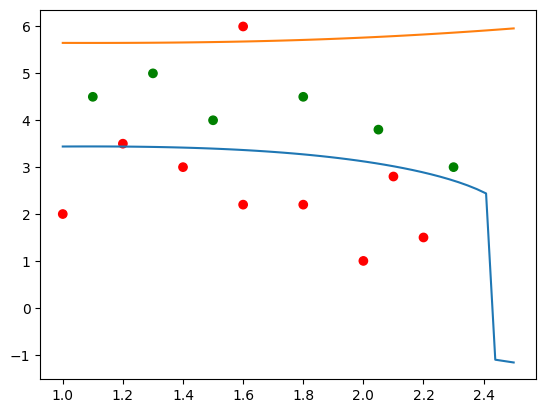

In [135]:
px = np.linspace(1, 2.5)
# y = theta[0] + theta[1]*px + theta[2]*y + theta[3]*px**2 + theta[4]*y**2 + theta[5]*px**3 + theta[6]*y**3

roots = np.array([])

for p in px:
    current_roots = np.roots([theta[8], theta[6], theta[4], theta[2], theta[0] + theta[1]*p + theta[3]*p**2 + theta[5]*p**3+ theta[7]*p**4])
    # print(current_roots)
    roots = np.reshape(np.append(roots, current_roots), (-1, 4))


# the plot doesn't work
plt.plot(px, roots[:, 1])
plt.plot(px, roots[:, 0])

plt.scatter(X[0], X[1], c=np.where(Y_predict <= 0.5, 'red', 'green'))
plt.show()

In [153]:
def predict(X):
    powers = np.arange(1, degree)
    X_powers = X[:,:, None]**powers
    print(X_powers)
    transposed = X_powers.transpose(1,0).reshape(X_powers.shape[1], -1, order='F')
    print(transposed)
    X_final = np.insert(transposed, 0, 1, axis=1)
    print(X_final)
    
    return X_final.dot(theta)

In [154]:
print(predict(np.array([[2.5, 5]])))


[[[  2.5      6.25    15.625   39.0625]
  [  5.      25.     125.     625.    ]]]


ValueError: axes don't match array